[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ElMartinez31/Data_Science/blob/main/Projects/Classical_Frameworks/sentiment_analysis.ipynb)

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [100]:
df = pd.read_excel("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/Sentiment_Analysis/BBDD.xlsx")
df.head()

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [101]:
df = df[['review_es', 'sentimiento']]

In [81]:
df

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo
49997,Soy católica enseñada en escuelas primarias pa...,negativo
49998,Voy a tener que estar en desacuerdo con el com...,negativo


<Axes: >

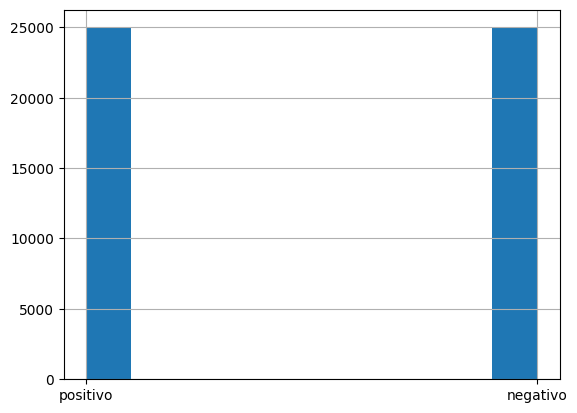

In [102]:
#sns.histplot(data = df, x = 'sentimiento')
#or
df['sentimiento'].hist()

In [103]:
df['target'] = df['sentimiento'].map({'positivo' : 1, 'negativo' : 0})

In [104]:
df_train, df_test = train_test_split(df)

In [105]:
df_test

,review_es,sentimiento,target
48873,"..... y es una buena, también.De hecho, este p...",positivo,1
7015,Este es uno de mis favoritos de todos los tiem...,positivo,1
17191,Vi esto en el cable recientemente y un poco lo...,negativo,0
535,Esta película es realmente vil.Juega en la par...,negativo,0
1077,"Después de 15 minutos, observando la película,...",negativo,0
...,...,...,...
32625,Esta es una historia sobre un viaje realizado ...,positivo,1
35209,Me encanta esta película .... ¡Uno de mis favo...,positivo,1
21316,Vaugely recuerdo haber visto esto cuando tenía...,positivo,1
45817,"Bo es Jane Parker, cuyo padre antropólogo perd...",negativo,0


In [106]:
#rappel: Le TF-IDF Vectorizer dans scikit-learn transforme une collection de documents textuels en
# une matrice sparse où chaque ligne représente un document, et chaque colonne
# correspond à un mot unique.
vectorize = TfidfVectorizer(max_features=2000)


In [107]:
X_train = vectorize.fit_transform(df_train['review_es'])
X_test = vectorize.transform(df_test['review_es'])

In [108]:
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3463065 stored elements in Compressed Sparse Row format>

In [109]:
Y_train = df_train['target']
Y_test = df_test['target']

In [110]:
model = LogisticRegression(max_iter = 1000)
#La régression logistique utilise une méthode d'optimisation (comme la descente de gradient)
# pour ajuster ses coefficients.

In [111]:
model.fit(X_train,Y_train)
model.predict(X_test)


array([1, 1, 1, ..., 1, 0, 0])

In [112]:
model.score(X_train,Y_train)

0.8785066666666667

In [113]:
model.score(X_test, Y_test)

0.86408

In [114]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

cm = confusion_matrix(Y_train, P_train, normalize = 'true')
cm
cm_test = confusion_matrix(Y_test, P_test, normalize = 'true')
cm_test

array([[0.85055468, 0.14944532],
       [0.12213247, 0.87786753]])

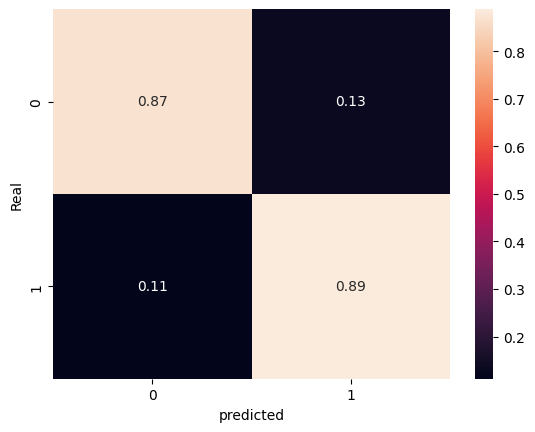

In [115]:
def plot_cm(cm):
  df_cm = pd.DataFrame(cm, index = ['0','1'], columns = ['0','1'])
  ax = sns.heatmap(df_cm, annot = True)
  ax.set_xlabel("predicted")
  ax.set_ylabel("Real")

plot_cm(cm)


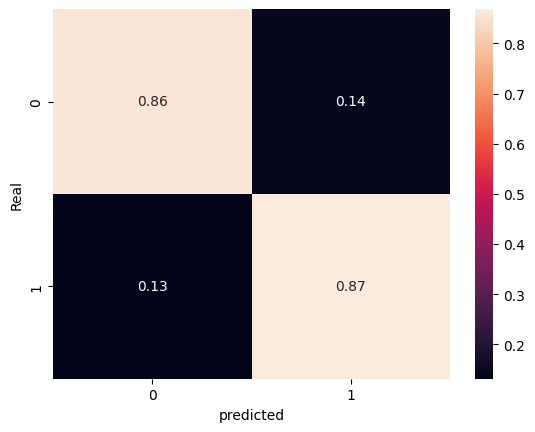

In [96]:
plot_cm(cm_test)

In [166]:
word_index_map = vectorize.vocabulary_ # nombre de fois où un mot apparait dans le vectorizer
word_index_map["si"]


1665

In [130]:
# model.coef_[0] fait référence aux coefficients associés à chaque
# caractéristique (mot)
model.coef_[0].size


# Exemple fictif de coefficients
#Imaginons que vous ayez un vocabulaire avec les mots suivants après vectorisation TF-IDF :
#['amour', 'haine', 'merveilleux', 'triste', 'bon']
#model.coef_ = [[ 0.2, -1.5,  0.3, -2.0,  1.0]]  # coefficients pour la classe négative (classe 0)
#Dans ce cas, model.coef_[0] serait :
#[ 0.2, -1.5,  0.3, -2.0,  1.0]
#Le mot "haine" a un coefficient -1.5 et contribue fortement à prédire un sentiment négatif.
#Le mot "triste" a un coefficient -2.0, ce qui montre qu'il est un fort indicateur de sentiment négatif.
#Le mot "bon" a un coefficient 1.0, ce qui signifie qu'il est plus susceptible de prédire un sentiment positif.

2000

In [137]:
seuil = 4

print('most positive words:')
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight > seuil:
    print(word,weight)

print('most negatiuve words:')
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight < -seuil:
    print(word,weight)


most positive words:
mejores 4.337512064852274
excelente 8.289717579278458
perfecto 4.444983249065429
hoy 4.280760901782387
increíble 4.056874148083561
disfruté 4.439080131191021
definitivamente 4.023055904321478
encantó 4.993447306830354
maravillosa 4.349702283190092
excelentes 4.092671779671559
most negatiuve words:
no -4.322996891450306
basura -5.254557343555777
terrible -7.641142862392181
mal -5.988310093919429
aburrido -6.775711964604391
peor -10.366831129884316
mala -7.383612799994601
horrible -9.160338892530902
pobre -6.037892517011381
desafortunadamente -4.648148299533463
peores -7.416904056299249
estúpida -4.316072271196395
decepción -4.635062496593725
decepcionante -4.665198928481947
aburrida -6.798460532290041
mierda -4.232266235529353


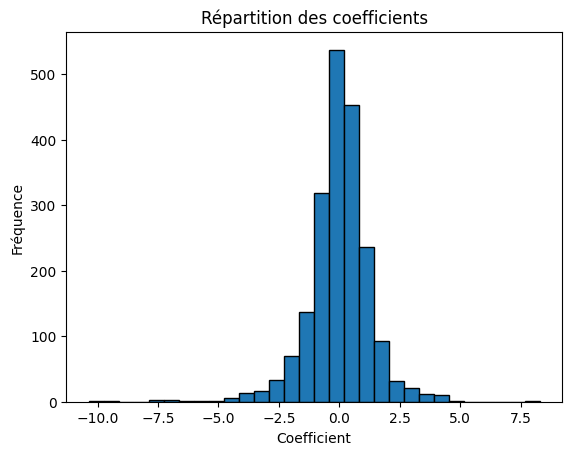

In [136]:
coefficients = model.coef_[0]

# Tracer un histogramme des coefficients
plt.hist(coefficients, bins=30, edgecolor='black')
plt.title('Répartition des coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Fréquence')
plt.show()

In [174]:
#now let's put our model in practice

comments = ["la pelicula es mierda", "no la recommiendo", "ese dia me encanto", "hombre"]


In [175]:
x = vectorize.transform(comments)
Pred = model.predict(x)

In [160]:
#get the model classes
classes = model.classes_
classes



array([0, 1])

In [176]:
for i in range(len(comments)):
  if classes[Pred[i]] == 0:
    print(f'the sentence: {comments[i]} is negative')
  else:

    print(f'the sentence: {comments[i]} is positive')

the sentence: la pelicula es mierda is negative
the sentence: no la recommiendo is negative
the sentence: ese dia me encanto is positive
the sentence: hombre is positive


**Muticlasses**


In [178]:
df = pd.read_csv("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/Sentiment_Analysis/Twitter_Data.csv")


In [180]:
df['category'].unique()

array(['Negativo', 'Neutro', 'Positivo'], dtype=object)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162968 entries, 0 to 162967
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162968 non-null  object
 1   category    162968 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


<Axes: >

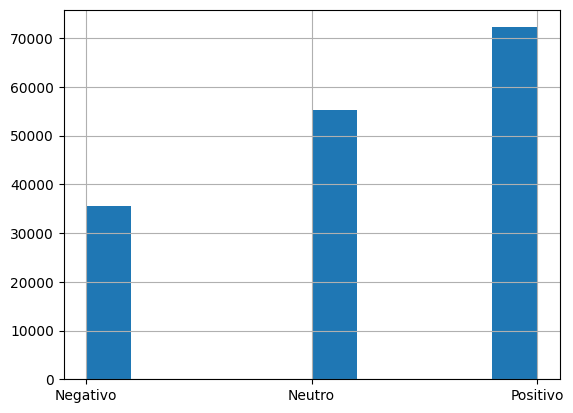

In [182]:
df.category.hist()

In [187]:
target_map = {'Positivo' : 1, 'Negativo': 0, 'Neutro' : 2}
df["target"] = df["category"].map(target_map)

In [188]:
df_train, df_test = train_test_split(df)

In [189]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['clean_text'])
X_train

<122226x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1767720 stored elements in Compressed Sparse Row format>

In [190]:
X_test = vectorizer.transform(df_test['clean_text'])
X_test

<40742x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 585055 stored elements in Compressed Sparse Row format>

In [191]:
Y_train = df_train['target']
Y_test = df_test['target']

In [192]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8970431823016379
Test acc: 0.8913160865936871


In [193]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [194]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.76060777, 0.11990246, 0.11948978],
       [0.03662215, 0.90277011, 0.06060773],
       [0.00856692, 0.01368766, 0.97774542]])

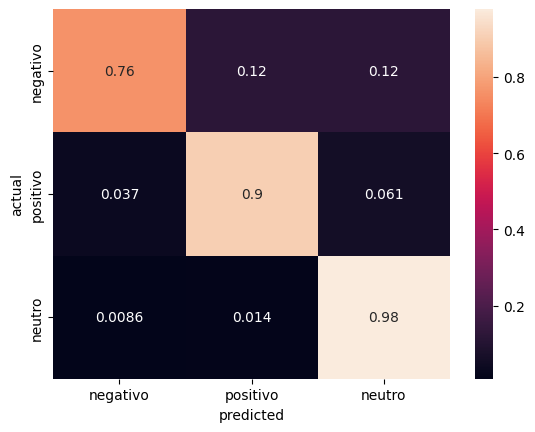

In [197]:
def plot_cm(cm) :
  classes = ['negativo', 'positivo', 'neutro']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(data = df_cm, annot = True)
  ax.set_xlabel("predicted")
  ax.set_ylabel("actual")
plot_cm(cm)